In [1]:
# import packages
import itertools
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
import time

from keras import metrics
from keras.models import Sequential

from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.layers.core import Dropout

from keras.optimizers import Adam
from keras.optimizers import RMSprop

from keras.utils import np_utils

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from tensorflow import keras

C:\Users\james\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\james\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\james\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")
all_data = pd.concat([train, test])

# EDA

In [3]:
train.describe().columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000,60000.0
mean,4.500000,0.0,0.0,0.0,0.0,0.0,0.008817,0.029467,0.037767,0.075933,...,0.015583,0.016450,0.013417,0.022300,0.012217,0.001383,0.003783,0.0,0.002717,0.0
std,2.872305,0.0,0.0,0.0,0.0,0.0,1.474271,2.700491,2.726371,3.993023,...,1.443852,1.958914,1.342572,2.051846,1.730959,0.338846,0.926724,0.0,0.665445,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
50%,4.500000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,157.000000,255.000000,255.000000,83.000000,227.000000,0.0,163.000000,0.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 359.3 MB


In [7]:
train.isnull().sum().value_counts()

0    785
dtype: int64

In [8]:
# separate dependent and independent variables
X = train.drop('label', axis = 1).values
y = train['label'].values
test_X = test.drop('id', axis = 1).values

all_data = np.concatenate((X,test_X))

In [9]:
#check for inf or nan values in data
print(np.isnan(X).any())
print(np.isinf(X).any())
print(np.isnan(y).any())
print(np.isinf(y).any())

False
False
False
False


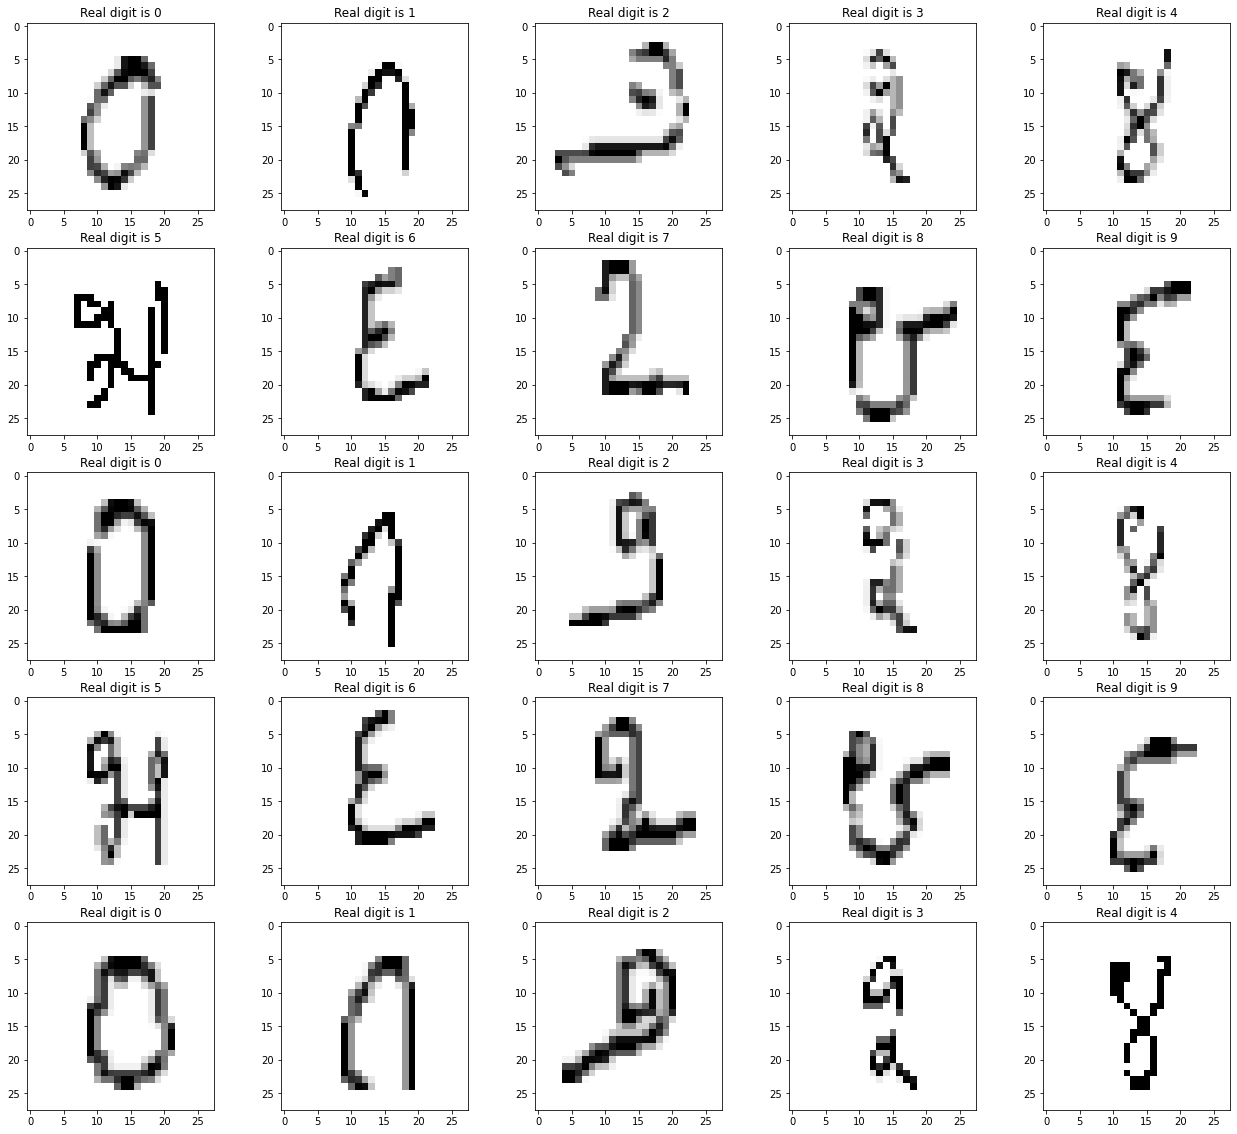

In [10]:
# Show 25 digits of data
fig, axis = plt.subplots(5, 5, figsize=(22, 20))

for i, ax in enumerate(axis.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='binary')
    ax.set(title = "Real digit is {}".format(y[i]))

## Pre-processing

In [11]:
X = X/255
test_X = test_X /255

In [12]:
num_classes = 10
y = np_utils.to_categorical(y, num_classes)

In [13]:
input_dim = X.shape[1]
input_dim

784

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [15]:
#Function to visualize model behaviors
def draw_model(model):
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(model.history['mae'])
    plt.plot(model.history['acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    plt.subplot(2,1,2)
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')

    plt.tight_layout()
    plt.show()    

In [16]:
# funtion to write predictions
def write_preds(preds, fname):
    pd.DataFrame({"id": list(range(1,len(preds)+1)), "label":   preds}).to_csv(fname, index=False)

In [18]:
#function prints and plots the confusion matrix.

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(10,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
#reset keras values
keras.backend.clear_session()

## Model 1

In [20]:
model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model1.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics = ['accuracy'])

In [21]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [22]:
hidden1 = model1.layers[1]
hidden1.name

'dense'

In [23]:
# All the parameters of a layer can be accessed using its get_weights() and set_weights() methods. For a Dense layer,
# this includes both the connection weights and the bias terms
weights, biases = hidden1.get_weights()

In [24]:
weights.shape

(784, 10)

In [25]:
start = time.time()
modelfit1 = model1.fit(X_train, y_train, epochs=30,validation_split=0.2, verbose=2)
end = time.time()
print("Training took {:.2f}s".format(end - start))

Epoch 1/30
1200/1200 - 2s - loss: 0.4354 - accuracy: 0.8843 - val_loss: 0.1838 - val_accuracy: 0.9520
Epoch 2/30
1200/1200 - 2s - loss: 0.1501 - accuracy: 0.9583 - val_loss: 0.1518 - val_accuracy: 0.9592
Epoch 3/30
1200/1200 - 2s - loss: 0.1237 - accuracy: 0.9649 - val_loss: 0.1402 - val_accuracy: 0.9615
Epoch 4/30
1200/1200 - 2s - loss: 0.1112 - accuracy: 0.9680 - val_loss: 0.1367 - val_accuracy: 0.9619
Epoch 5/30
1200/1200 - 2s - loss: 0.1047 - accuracy: 0.9706 - val_loss: 0.1334 - val_accuracy: 0.9627
Epoch 6/30
1200/1200 - 2s - loss: 0.0989 - accuracy: 0.9722 - val_loss: 0.1363 - val_accuracy: 0.9625
Epoch 7/30
1200/1200 - 2s - loss: 0.0957 - accuracy: 0.9735 - val_loss: 0.1308 - val_accuracy: 0.9639
Epoch 8/30
1200/1200 - 2s - loss: 0.0927 - accuracy: 0.9743 - val_loss: 0.1347 - val_accuracy: 0.9638
Epoch 9/30
1200/1200 - 2s - loss: 0.0908 - accuracy: 0.9752 - val_loss: 0.1342 - val_accuracy: 0.9633
Epoch 10/30
1200/1200 - 2s - loss: 0.0890 - accuracy: 0.9754 - val_loss: 0.1335 - 

In [26]:
modelfit1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

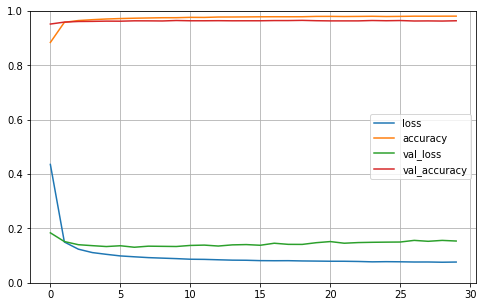

In [27]:
# Learning curves: the mean training loss and accuracy measured over each epoch, and the mean validation loss and 
# accuracy measured at the end of each epoch
pd.DataFrame(modelfit1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
model1.evaluate(X_test, y_test)

375/375 [==============================] - 0s 1ms/step - loss: 0.1312 - accuracy: 0.9681


[0.13123245537281036, 0.9680833220481873]

In [29]:
y_proba = model1.predict_classes(test_X)
y_proba.round(2)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 0, 2, ..., 1, 6, 3], dtype=int64)

In [31]:
y_true = np.argmax(y_test, axis = 1)

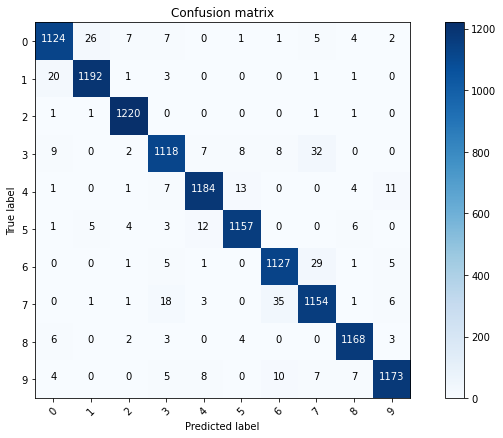

In [32]:
y_pred1 = model1.predict(X_test)
y_pred1_classes = np.argmax(y_pred1, axis=1)

conf1 = confusion_matrix(y_true,y_pred1_classes)
plot_confusion_matrix(conf1,classes = range(10))

This model perfomed slightly better against the validation set after fitting to the training set. This is likely due to luck rather than the model parameters. This instance of "luck" indicate a balanced model with appropriate variance.

## Model 2

In [33]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(20, activation ='relu'),
    keras.layers.Dense(10, activation="softmax")
])

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model2.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics = ['accuracy'])

In [34]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [35]:
start=time.time()
modelfit2 = model2.fit(X_train, y_train, epochs=30, validation_split=0.2)
end=time.time()
print("Training took {:.2f}s".format(end - start))

Epoch 1/30
1200/1200 [==============================] - 3s 2ms/step - loss: 0.2852 - accuracy: 0.9285 - val_loss: 0.1464 - val_accuracy: 0.9600
Epoch 2/30
1200/1200 [==============================] - 2s 2ms/step - loss: 0.1196 - accuracy: 0.9655 - val_loss: 0.1281 - val_accuracy: 0.9650
Epoch 3/30
1200/1200 [==============================] - 2s 2ms/step - loss: 0.1030 - accuracy: 0.9709 - val_loss: 0.1239 - val_accuracy: 0.9660
Epoch 4/30
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0928 - accuracy: 0.9736 - val_loss: 0.1221 - val_accuracy: 0.9663
Epoch 5/30
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0857 - accuracy: 0.9753 - val_loss: 0.1209 - val_accuracy: 0.9678
Epoch 6/30
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0808 - accuracy: 0.9771 - val_loss: 0.1190 - val_accuracy: 0.9680
Epoch 7/30
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0762 - accuracy: 0.9796 - val_loss: 0.1193 - val_accuracy:

In [36]:
modelfit2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

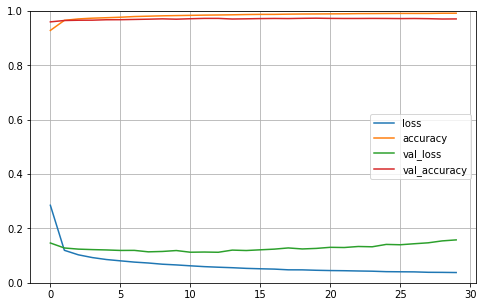

In [37]:
# Learning curves: the mean training loss and accuracy measured over each epoch, and the mean validation loss and 
# accuracy measured at the end of each epoch
pd.DataFrame(modelfit2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [38]:
model2.evaluate(X_test, y_test)

375/375 [==============================] - 0s 1ms/step - loss: 0.1314 - accuracy: 0.9744


[0.1314161866903305, 0.9744166731834412]

In [39]:
y_proba2 = model2.predict_classes(test_X)
write_preds(y_proba2, "mlp2.csv")

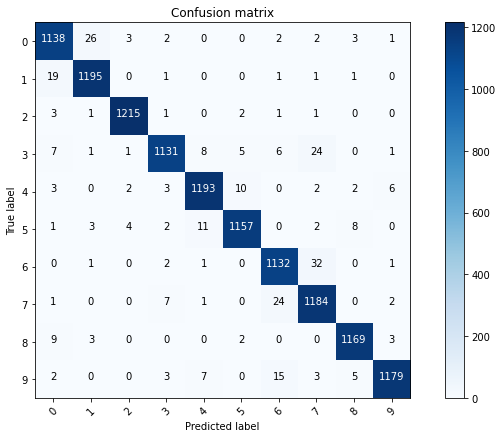

In [40]:
y_pred2 = model2.predict(X_test)
y_pred2_classes = np.argmax(y_pred2, axis=1)

conf2 = confusion_matrix(y_true,y_pred2_classes)
plot_confusion_matrix(conf2,classes = range(10))

Model2 performed better than model1. This is likely due to the addition of nodes in the layers. The additional layers assisted in accurate generalized predictions. 

## Model 3

In [41]:
model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(10, activation ='relu'),
    keras.layers.Dense(10, activation ='relu'),
    keras.layers.Dense(10, activation ='relu'),
    keras.layers.Dense(10, activation ='relu'),
    keras.layers.Dense(10, activation="softmax")
])

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model3.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics = ['accuracy'])

In [42]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
Total params: 8,290
Trainable params: 8,290
Non-trainable params: 0
____________________________________________________

In [43]:
start=time.time()
modelfit3 = model3.fit(X_train, y_train, epochs=30, validation_split=0.2)
end=time.time()
print("Training took {:.2f}s".format(end - start))

Epoch 1/30
1200/1200 [==============================] - 3s 3ms/step - loss: 0.6760 - accuracy: 0.7777 - val_loss: 0.2322 - val_accuracy: 0.9347
Epoch 2/30
1200/1200 [==============================] - 3s 2ms/step - loss: 0.1924 - accuracy: 0.9465 - val_loss: 0.1867 - val_accuracy: 0.9455
Epoch 3/30
1200/1200 [==============================] - 3s 2ms/step - loss: 0.1536 - accuracy: 0.9574 - val_loss: 0.1532 - val_accuracy: 0.9567
Epoch 4/30
1200/1200 [==============================] - 3s 2ms/step - loss: 0.1350 - accuracy: 0.9620 - val_loss: 0.1496 - val_accuracy: 0.9597
Epoch 5/30
1200/1200 [==============================] - 3s 2ms/step - loss: 0.1237 - accuracy: 0.9662 - val_loss: 0.1404 - val_accuracy: 0.9615
Epoch 6/30
1200/1200 [==============================] - 3s 2ms/step - loss: 0.1148 - accuracy: 0.9685 - val_loss: 0.1445 - val_accuracy: 0.9598
Epoch 7/30
1200/1200 [==============================] - 3s 2ms/step - loss: 0.1099 - accuracy: 0.9696 - val_loss: 0.1360 - val_accuracy:

In [44]:
modelfit3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

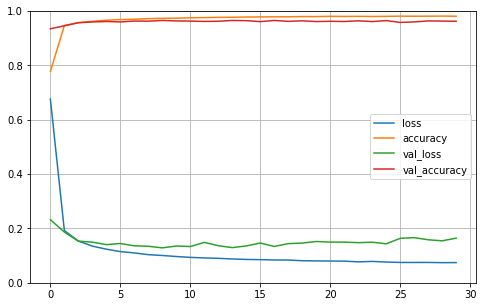

In [45]:
# Learning curves: the mean training loss and accuracy measured over each epoch, and the mean validation loss and 
# accuracy measured at the end of each epoch
pd.DataFrame(modelfit3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [46]:
model3.evaluate(X_test, y_test)

375/375 [==============================] - 0s 1ms/step - loss: 0.1704 - accuracy: 0.9644


[0.17040984332561493, 0.9644166827201843]

In [47]:
y_proba3 = model3.predict_classes(test_X)
write_preds(y_proba3, "mlp3.csv")

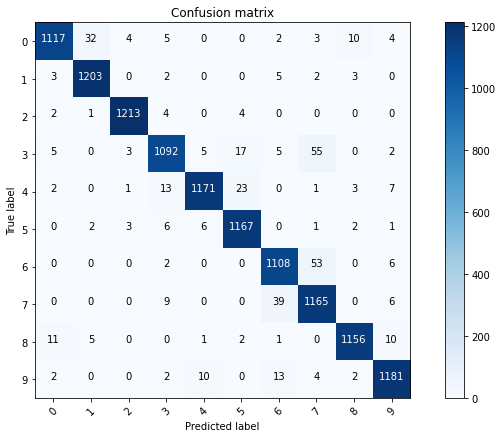

In [48]:
y_pred3 = model3.predict(X_test)
y_pred3_classes = np.argmax(y_pred3, axis=1)

conf3 = confusion_matrix(y_true,y_pred3_classes)
plot_confusion_matrix(conf3,classes = range(10))

Model3 performed slightly worse than model2, the model is likely overfit due to a higher node to layer ratio. Adding more nodes, skewed the weights in the output nodes thus decreasing the score on unseen data. I hypothesize that the fourth model will have a slightly better score than model2 due to similar nodes with more layers.

## Model 4

In [49]:
model4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(20, activation ='relu'),
    keras.layers.Dense(20, activation ='relu'),
    keras.layers.Dense(20, activation ='relu'),
    keras.layers.Dense(20, activation ='relu'),
    keras.layers.Dense(10, activation="softmax")
])

model4.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics = ['accuracy'])

In [50]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_10 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_11 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_12 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                210       
Total params: 17,170
Trainable params: 17,170
Non-trainable params: 0
__________________________________________________

In [51]:
start=time.time()
modelfit4 = model4.fit(X_train, y_train, epochs=30, validation_split=0.2)
end=time.time()
print("Training took {:.2f}s".format(end - start))

Epoch 1/30
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3781 - accuracy: 0.8889 - val_loss: 0.1552 - val_accuracy: 0.9581
Epoch 2/30
1200/1200 [==============================] - 3s 2ms/step - loss: 0.1252 - accuracy: 0.9640 - val_loss: 0.1428 - val_accuracy: 0.9614
Epoch 3/30
1200/1200 [==============================] - 3s 2ms/step - loss: 0.1037 - accuracy: 0.9709 - val_loss: 0.1254 - val_accuracy: 0.9659
Epoch 4/30
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0906 - accuracy: 0.9750 - val_loss: 0.1195 - val_accuracy: 0.9679
Epoch 5/30
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0813 - accuracy: 0.9781 - val_loss: 0.1093 - val_accuracy: 0.9700
Epoch 6/30
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0752 - accuracy: 0.9801 - val_loss: 0.1082 - val_accuracy: 0.9708
Epoch 7/30
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0691 - accuracy: 0.9817 - val_loss: 0.1035 - val_accuracy:

In [52]:
modelfit4.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

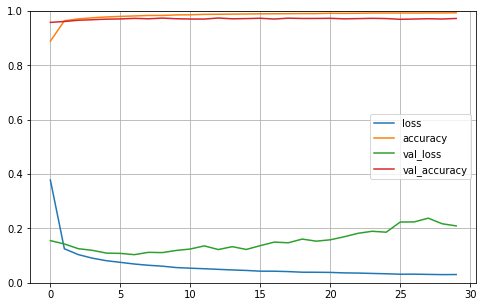

In [53]:
# Learning curves: the mean training loss and accuracy measured over each epoch, and the mean validation loss and 
# accuracy measured at the end of each epoch
pd.DataFrame(modelfit4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [54]:
model4.evaluate(X_test, y_test)

375/375 [==============================] - 1s 1ms/step - loss: 0.1771 - accuracy: 0.9742


[0.17708884179592133, 0.9741666913032532]

In [55]:
y_proba4 = model4.predict_classes(test_X)
write_preds(y_proba4, "mlp4.csv")

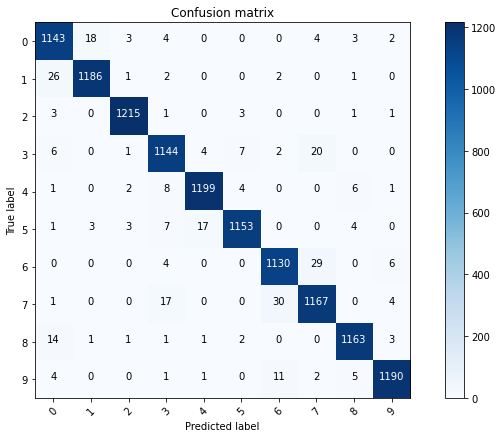

In [56]:
y_pred4 = model4.predict(X_test)
y_pred4_classes = np.argmax(y_pred4, axis=1)

conf4 = confusion_matrix(y_true,y_pred4_classes)
plot_confusion_matrix(conf4,classes = range(10))

Model4 performed similar to model2 which indicates that 20 nodes will most likely perform better than 10 with added layers. The additional layer allows the model to fit closer to the data without overfitting. more nodes will overfit, more layers with generalize more precise predictions.

 ## Model 5

In [57]:
model5 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, activation ='relu'),
    keras.layers.Dropout(0.15),
    keras.layers.Dense(128, activation ='relu'),
    keras.layers.Dropout(0.15),
    keras.layers.Dense(10, activation="softmax")
])

model5.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics = ['accuracy'])

In [58]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
________________________________________________

In [59]:
start=time.time()
modelfit5 = model5.fit(X_train, y_train, epochs=30, validation_split=0.2)
end=time.time()
print("Training took {:.2f}s".format(end - start))

Epoch 1/30
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1978 - accuracy: 0.9429 - val_loss: 0.0937 - val_accuracy: 0.9726
Epoch 2/30
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0846 - accuracy: 0.9758 - val_loss: 0.0829 - val_accuracy: 0.9785
Epoch 3/30
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0654 - accuracy: 0.9823 - val_loss: 0.0786 - val_accuracy: 0.9800
Epoch 4/30
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0547 - accuracy: 0.9858 - val_loss: 0.0839 - val_accuracy: 0.9808
Epoch 5/30
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0508 - accuracy: 0.9878 - val_loss: 0.0821 - val_accuracy: 0.9820
Epoch 6/30
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0455 - accuracy: 0.9888 - val_loss: 0.0921 - val_accuracy: 0.9814
Epoch 7/30
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0400 - accuracy: 0.9907 - val_loss: 0.0929 - val_accuracy:

In [60]:
modelfit5.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

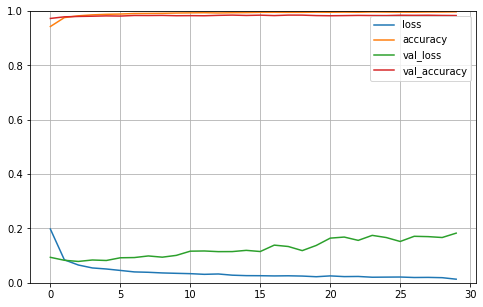

In [61]:
# Learning curves: the mean training loss and accuracy measured over each epoch, and the mean validation loss and 
# accuracy measured at the end of each epoch
pd.DataFrame(modelfit5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [62]:
model5.evaluate(X_test, y_test)

375/375 [==============================] - 0s 1ms/step - loss: 0.1822 - accuracy: 0.9864


[0.1821628361940384, 0.9864166378974915]

In [63]:
y_proba5 = model5.predict_classes(test_X)
write_preds(y_proba5, "mlp5.csv")

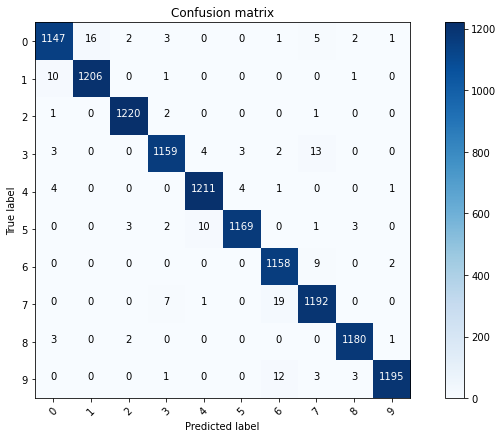

In [64]:
y_pred5 = model5.predict(X_test)
y_pred5_classes = np.argmax(y_pred5, axis=1)

conf5=confusion_matrix(y_true,y_pred5_classes)
plot_confusion_matrix(conf5, classes = range(10))

Model5 was an additional set to determine if fitting to a model indluding dropout would help predictions.  The model performed very well against the training set.  The model intialized with a high score and slightly increased with each epoch.